### Επίδραση του Αριθμού των Δωρεάν Αδειών στα Κέρδη και άλλες Μεταβλητές των Επιχειρήσεων

**Πείραμα:**
- Emission cap = 80% BAU emissions
- 9 εταιρείες
- 3 τομείς
  - Ο 3ος τομέας έχει **πολύ μεγάλο** μέγεθος σε όρους πωλήσεων

**Διαδικασία:**
Δίνουμε σταδιακά περισσότερες δωρεάν άδειες στις 3 εταιρείες του 1ου τομέα και παρατηρούμε τις επιπτώσεις στα κέρδη και άλλες μεταβλητές. Στον 2ο τομέα, δεν δίνονται δωρεάν άδειες.

- Δωρεάν άδειες στον 1ο τομέα: από 0 έως την ποσότητα παραγωγής (q).


In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..', 'src')))
from funkwpap import *
import sympy as sp, pandas as pd, numpy as np, tqdm, time, sys, matplotlib.pyplot as plt, tqdm
from statistics import mean
from scipy.optimize import fsolve
from random import random


In [2]:
x = sp.symbols('x')
cap = 2000 # total emission cap
Regulator21 = Regulator("test1", permit_price = 2.4079, emission_cap = cap)
sector1 = Sector('cement', price_demand_function= 100 - 0.1*x, free_emission_multiplier= 0, regulator= Regulator21)
sector2 = Sector('steel', price_demand_function=150 - 0.1*x, free_emission_multiplier= 0, regulator= Regulator21)
sector3 = Sector('paper', price_demand_function= 200 - 0.02*x**1.5, free_emission_multiplier= 0, regulator= Regulator21)
country1 = Country('DE', 1, regulator= Regulator21)
country2 = Country('FI', 0.5, regulator= Regulator21)
country3 = Country('GR', size= 0.1, regulator= Regulator21)

# Create Firms using objects
firm1 = Firm('firm1', 1, 1, x*0, 10*x+ 2*x**2 + 2*x**3 , 0, 0, 0, regulator= Regulator21)
firm2 = Firm('firm2', 1, 2, x*0, 11*x+ 3*x**2 + 2*x**3, 0, 0, 0, regulator= Regulator21)
firm3 = Firm('firm3', 1, 3, x*0, 5*x+ 4*x**2 + 5*x**3 , 0, 0, 0, regulator= Regulator21)
firm4 = Firm('firm4', 2, 1, x*0, 7*x+ 5*x**2 + 3*x**3 , 0, 0, 0, regulator= Regulator21)
firm5 = Firm('firm5', 2, 2, x*0, 1*x+ 6*x**2 + 2*x**3 , 0, 0, 0, regulator= Regulator21)
firm6 = Firm('firm6', 2, 3, x*0, 2*x+ 7*x**2 + 3*x**3 , 0, 0, 0, regulator= Regulator21)
firm7 = Firm('firm7', 3, 1, x*0, 3*x+ 8*x**2 + 4*x**3 , 0, 0, 0, regulator= Regulator21)
firm8 = Firm('firm8', 3, 2, x*0, 4*x+ 9*x**2 + 10*x**3 , 0, 0, 0, regulator= Regulator21)
firm9 = Firm('firm9', 3, 3, x*0, 5*x+ 10*x**2 + 11*x**3 , 0, 0, 0, regulator= Regulator21)



In [3]:
Regulator21.BAU_calculator()

Set parameter Username
Academic license - for non-commercial use only - expires 2025-08-14


In [ ]:
Regulator21.emission_cap = Regulator21.BAU_emissions * 0.8

frees = np.linspace(0, 1, 100)

profits1 = []
profits2 = []
abatements1 = []
abatements2 = []
trades1 = []
trades2 = []
revenews1 = []
revenews2 = []
permit_price = []
outputs1 = []
outputs2 = []
emissions1 = []
emissions2 = []
permits_bought_1 = []
permits_bought_2 = []
permits_free_1 = []
permits_free_2 = []
permits_used_1 = []
permits_used_2 = []


for free in tqdm.tqdm(frees):
    
    
    sector1.free_emission_multiplier = free
    Regulator21.optimization_with_least_squares_ab()
    print(f"{free}: {Regulator21.equilibrium_tester(output = True,precision = 0.5)}")

    for firm in Regulator21.firm_registry.values():
        firm.calculate_profit_components()

    profits1.append(mean( float(i.profit) for i in sector1.firms))
    profits2.append(mean( float(i.profit) for i in sector2.firms + sector3.firms))
    abatements1.append(mean( float(i.abatement) for i in sector1.firms))
    abatements2.append(mean( float(i.abatement) for i in sector2.firms + sector3.firms))
    permits_used_1.append(mean( float(i.permits_used) for i in sector1.firms))
    permits_used_2.append(mean( float(i.permits_used) for i in sector2.firms + sector3.firms))
    permits_free_1.append(mean( float(i.free_permits) for i in sector1.firms))
    permits_free_2.append(mean( float(i.free_permits) for i in sector2.firms + sector3.firms))
    permits_bought_1.append(mean( float(i.permits_bought) for i in sector1.firms))
    permits_bought_2.append(mean( float(i.permits_bought) for i in sector2.firms + sector3.firms))
    trades1.append(mean( float(i.permits_costs) for i in sector1.firms))
    trades2.append(mean( float(i.permits_costs) for i in sector2.firms + sector3.firms))
    revenews1.append( mean(float(i.sales) for i in sector1.firms))
    revenews2.append(mean( float(i.sales) for i in sector2.firms + sector3.firms))
    permit_price.append(Regulator21.permit_price)
    outputs1.append(mean(float(i.actual_output) for i in sector1.firms))
    outputs2.append(mean(float(i.actual_output) for i in sector2.firms + sector3.firms))
    emissions1.append(mean(float(i.emission) for i in sector1.firms))
    emissions2.append(mean(float(i.emission) for i in sector2.firms + sector3.firms))    

  0%|          | 0/100 [00:00<?, ?it/s]

  1%|          | 1/100 [00:05<09:52,  5.99s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1403 ✔️ |  +9.91e-4 ✔️ |  -20.3707 ✔️ |  -20.5707 ✔️ |   +4.0741 ✔️ | 5/5
0.0: (True, 0.140332396890800)
Optimal solution found


  2%|▏         | 2/100 [00:11<09:39,  5.91s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.0474 ✔️ |  +1.21e-4 ✔️ |  -20.4875 ✔️ |  -20.6875 ✔️ |   +4.0975 ✔️ | 5/5
0.010101010101010102: (True, 0.0474343699989337)
Optimal solution found


  3%|▎         | 3/100 [00:19<11:07,  6.88s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1754 ✔️ |  +6.77e-4 ✔️ |  -20.5093 ✔️ |  -20.7093 ✔️ |   +4.1019 ✔️ | 5/5
0.020202020202020204: (True, 0.175397996804421)
Optimal solution found


  4%|▍         | 4/100 [00:26<11:03,  6.91s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1352 ✔️ |  +7.49e-4 ✔️ |  -20.6071 ✔️ |  -20.8071 ✔️ |   +4.1214 ✔️ | 5/5
0.030303030303030304: (True, 0.135227312676275)
Optimal solution found


  5%|▌         | 5/100 [00:34<11:32,  7.29s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1059 ✔️ |  +1.02e-4 ✔️ |  -20.6834 ✔️ |  -20.8834 ✔️ |   +4.1367 ✔️ | 5/5
0.04040404040404041: (True, 0.105850695301244)
Optimal solution found


  6%|▌         | 6/100 [00:42<11:27,  7.32s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1474 ✔️ |  +9.56e-4 ✔️ |  -20.7607 ✔️ |  -20.9607 ✔️ |   +4.1521 ✔️ | 5/5
0.05050505050505051: (True, 0.147377344557793)
Optimal solution found


  7%|▋         | 7/100 [00:49<11:24,  7.36s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |   +0.1196 ✔️ |  +5.04e-4 ✔️ |  -20.8393 ✔️ |  -21.0393 ✔️ |   +4.1679 ✔️ | 5/5
0.06060606060606061: (True, 0.119621500649483)


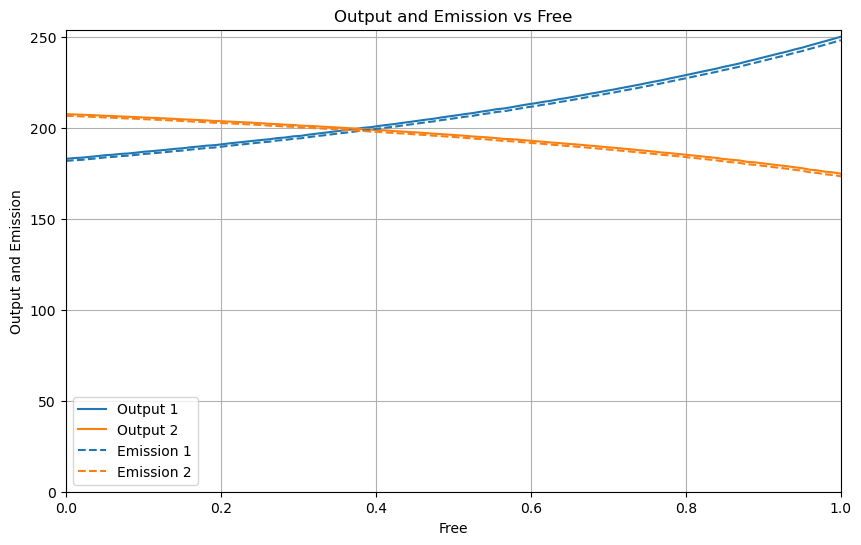

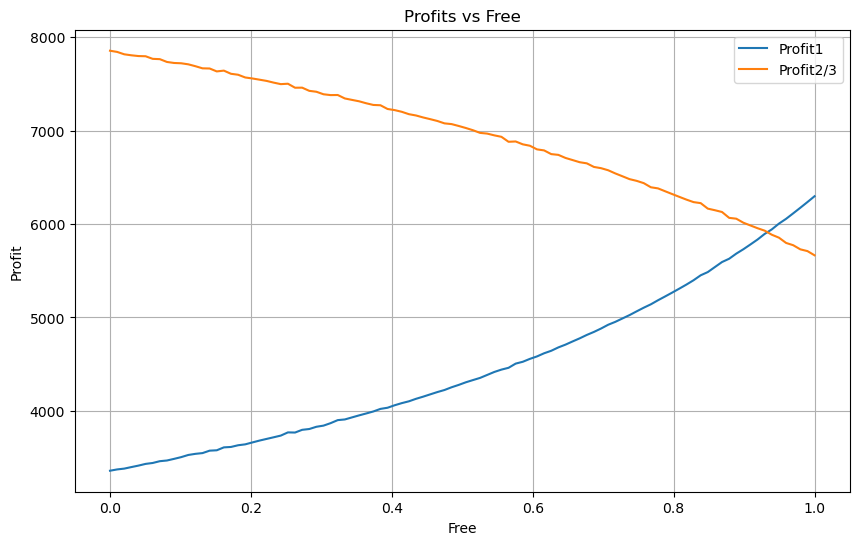

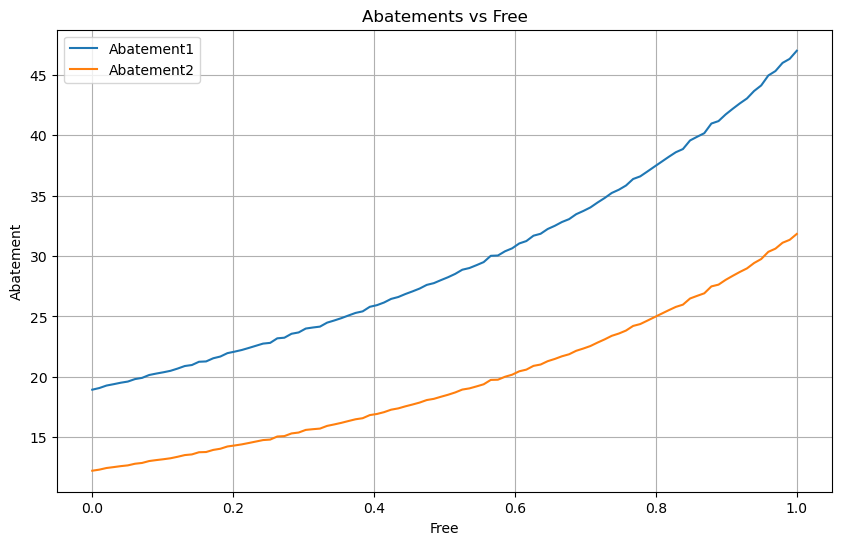

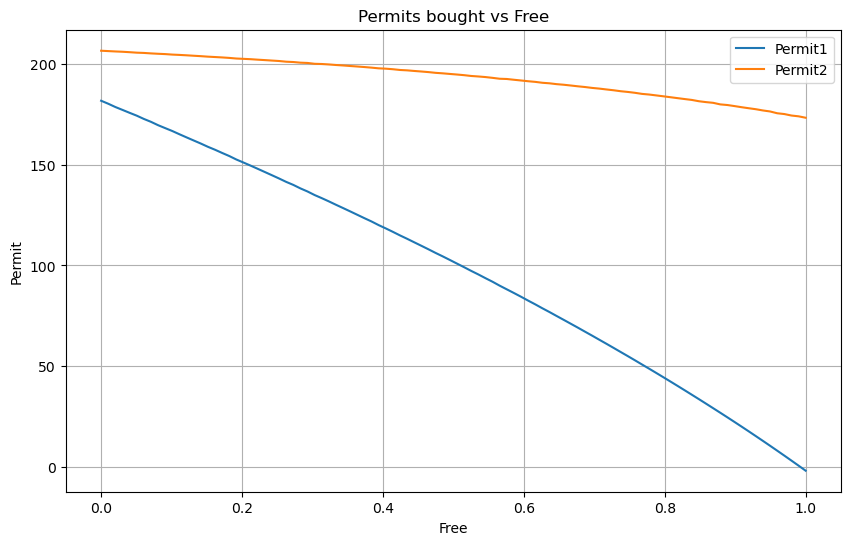

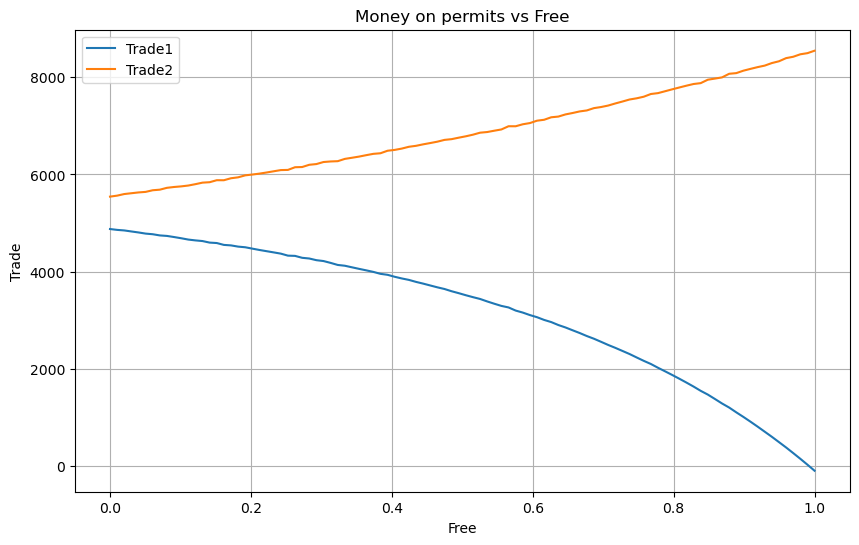

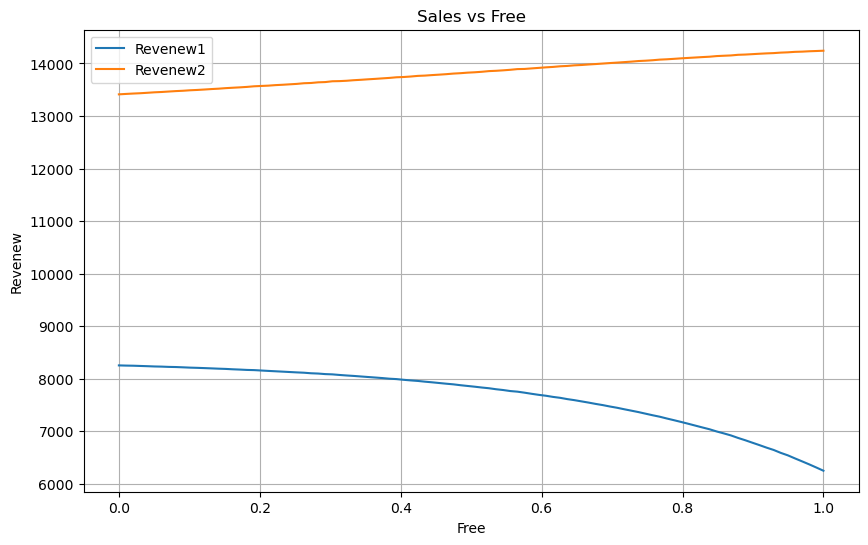

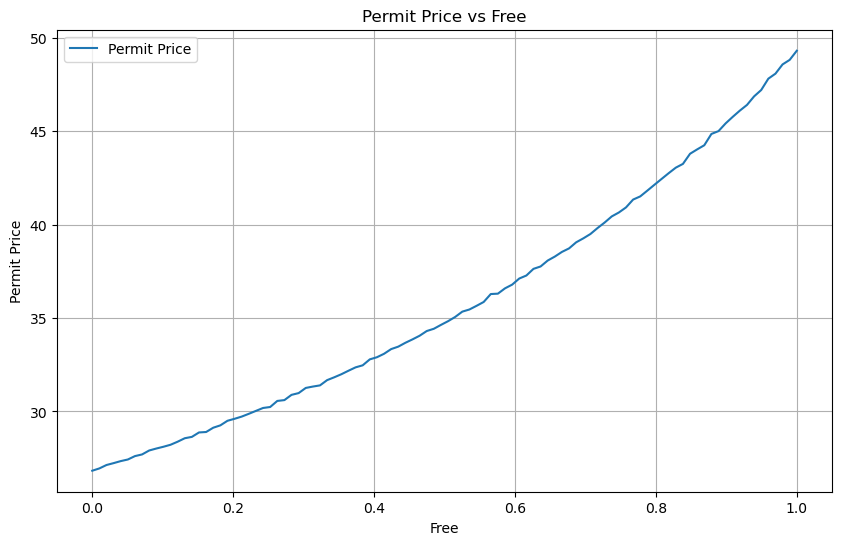

In [5]:
colors = {'b': '#1f77b4', 'o': '#ff7f0e'}

# Plot profit1 and profit2 with respect to frees
plt.figure(figsize=(10, 6))
plt.plot(frees, outputs1, label='Output 1', color = '#1f77b4')
plt.plot(frees, outputs2, label='Output 2', color = '#ff7f0e')
plt.plot(frees, emissions1, label='Emission 1', linestyle='--', color = '#1f77b4')
plt.plot(frees, emissions2, label='Emission 2', linestyle='--', color = '#ff7f0e')
plt.xlabel('Free')
plt.ylabel('Output and Emission')
plt.title('Output and Emission vs Free')
plt.legend()
plt.grid()
# Set the limits for the x and y axes
plt.xlim(0, 1)
plt.ylim(bottom=0)
plt.show()

# Plot profit1 and profit2 with respect to frees
plt.figure(figsize=(10, 6))
plt.plot(frees, profits1, label='Profit1')
plt.plot(frees, profits2, label='Profit2/3')
plt.xlabel('Free')
plt.ylabel('Profit')
plt.title('Profits vs Free')
plt.legend()
plt.grid()
plt.show()

# Plot abatement1 and abatement2 with respect to frees
plt.figure(figsize=(10, 6))
plt.plot(frees, abatements1, label='Abatement1')
plt.plot(frees, abatements2, label='Abatement2')
plt.xlabel('Free')
plt.ylabel('Abatement')
plt.title('Abatements vs Free')
plt.legend()
plt.grid()
plt.show()

# Plot permit1 and permit2 with respect to frees
plt.figure(figsize=(10, 6))
plt.plot(frees, permits_bought_1, label='Permits bought: sector 1', color = colors['b'])
plt.plot(frees, permits_bought_2, label='Permits bought: sector 2', color = colors['o'], alpha=0.5)
plt.plot(frees, permits_free_1, label='Permit Free: sector 1', color = colors['b'], linestyle='--')
plt.plot(frees, permits_free_2, label='Permit Free: sector 2', color = colors['o'], linestyle='--')
plt.plot(frees, permits_used_1, label='Permit Total: sector 1', color = colors['b'], linestyle='-.')
plt.plot(frees, permits_used_2, label='Permit Total: sector 2', color = colors['o'], linestyle='-.')
plt.xlabel('Free')
plt.ylabel('Permits')
plt.title('Permits  vs Free Multiplier of sector 1')
plt.legend()
plt.grid()
plt.show()

# Plot trade1 and trade2 with respect to frees
plt.figure(figsize=(10, 6))
plt.plot(frees, trades1, label='Trade1')
plt.plot(frees, trades2, label='Trade2')
plt.xlabel('Free')
plt.ylabel('Trade')
plt.title('Money on permits vs Free')
plt.legend()
plt.grid()
plt.show()

# Plot revenew1 and revenew2 with respect to frees
plt.figure(figsize=(10, 6))
plt.plot(frees, revenews1, label='Revenew1')
plt.plot(frees, revenews2, label='Revenew2')
plt.xlabel('Free')
plt.ylabel('Revenew')
plt.title('Sales vs Free')
plt.legend()
plt.grid()
plt.show()

# Plot permit_price with respect to frees
plt.figure(figsize=(10, 6))
plt.plot(frees, permit_price, label='Permit Price')
plt.xlabel('Free')
plt.ylabel('Permit Price')
plt.title('Permit Price vs Free')
plt.legend()
plt.grid()
plt.show()